<a href="https://colab.research.google.com/github/nehanagle/Advance-Boston-House-Price-Prediction/blob/main/Boston_House_prediction_AAIC_Liner_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Boston House price prediction**
The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [12]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
# Initializing the dataframe
import pandas as pd
data = pd.DataFrame(boston.data)

In [14]:
print(data.shape)


(506, 13)


In [15]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Features**

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000usd
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.

In [16]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### From Above we can see there's no missing value hence we can move ahead for Data Exploration

Text(0, 0.5, 'House Price')

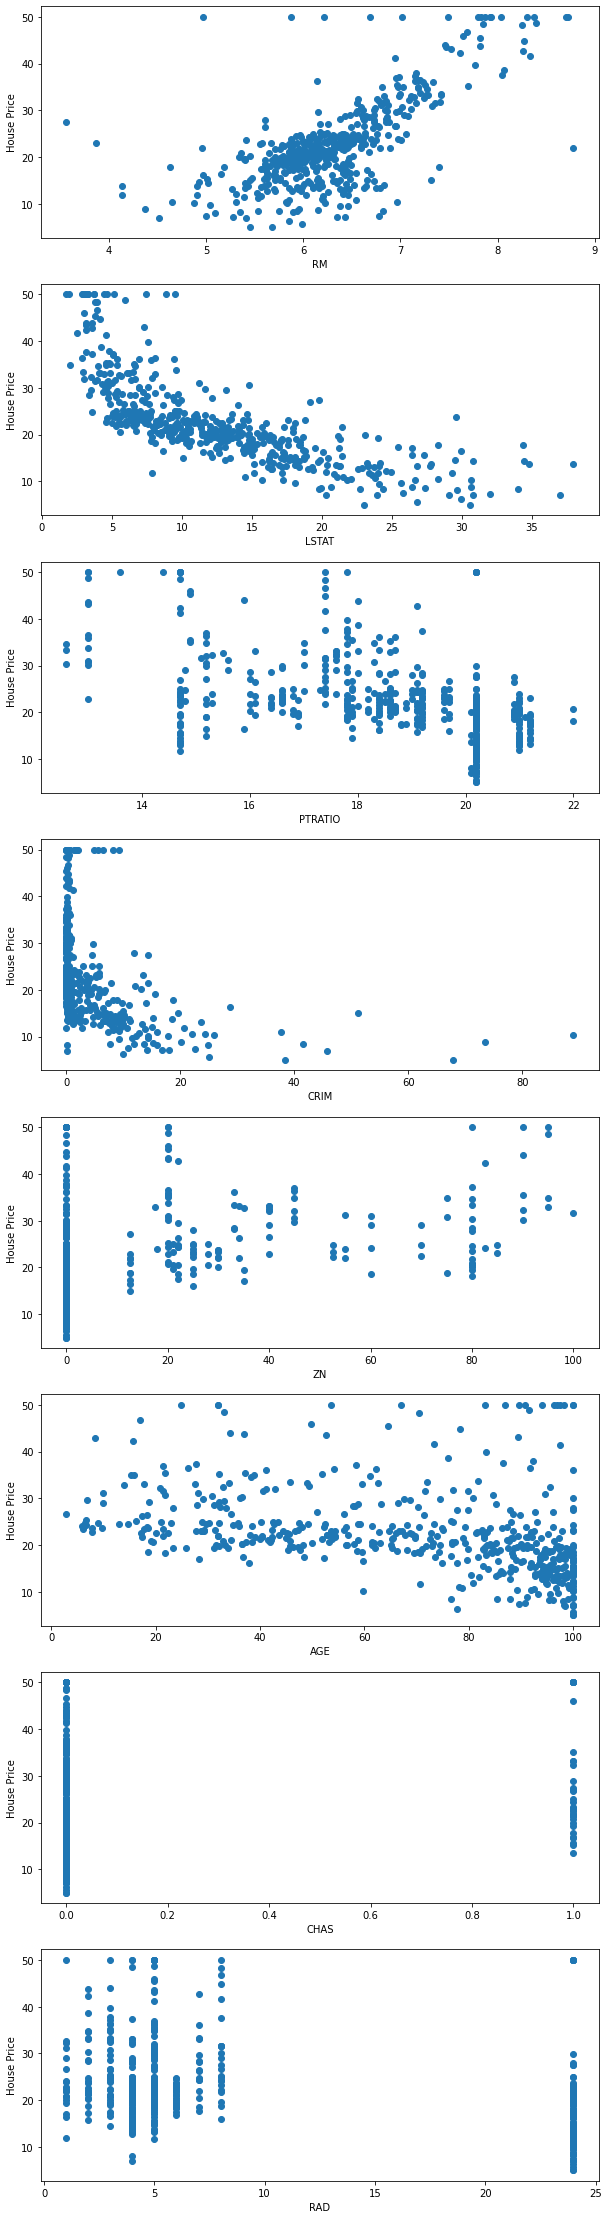

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, figsize=(10, 40))
ax[0].scatter(x = data['RM'], y = data['PRICE'])
ax[0].set_xlabel("RM")
ax[0].set_ylabel("House Price")
print()
print()
ax[1].scatter(x = data['LSTAT'], y = data['PRICE'])
ax[1].set_xlabel("LSTAT")
ax[1].set_ylabel("House Price")

ax[2].scatter(x = data['PTRATIO'], y = data['PRICE'])
ax[2].set_xlabel("PTRATIO")
ax[2].set_ylabel("House Price")

ax[3].scatter(x = data['CRIM'], y = data['PRICE'])
ax[3].set_xlabel("CRIM")
ax[3].set_ylabel("House Price")

ax[4].scatter(x = data['ZN'], y = data['PRICE'])
ax[4].set_xlabel("ZN")
ax[4].set_ylabel("House Price")

ax[5].scatter(x = data['AGE'], y = data['PRICE'])
ax[5].set_xlabel("AGE")
ax[5].set_ylabel("House Price")

ax[6].scatter(x = data['CHAS'], y = data['PRICE'])
ax[6].set_xlabel("CHAS")
ax[6].set_ylabel("House Price")

ax[7].scatter(x = data['RAD'], y = data['PRICE'])
ax[7].set_xlabel("RAD")
ax[7].set_ylabel("House Price")


From above plots we can see relation of every independent feature with dependent.


In [20]:
# check for null values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Feature Selection

In [21]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

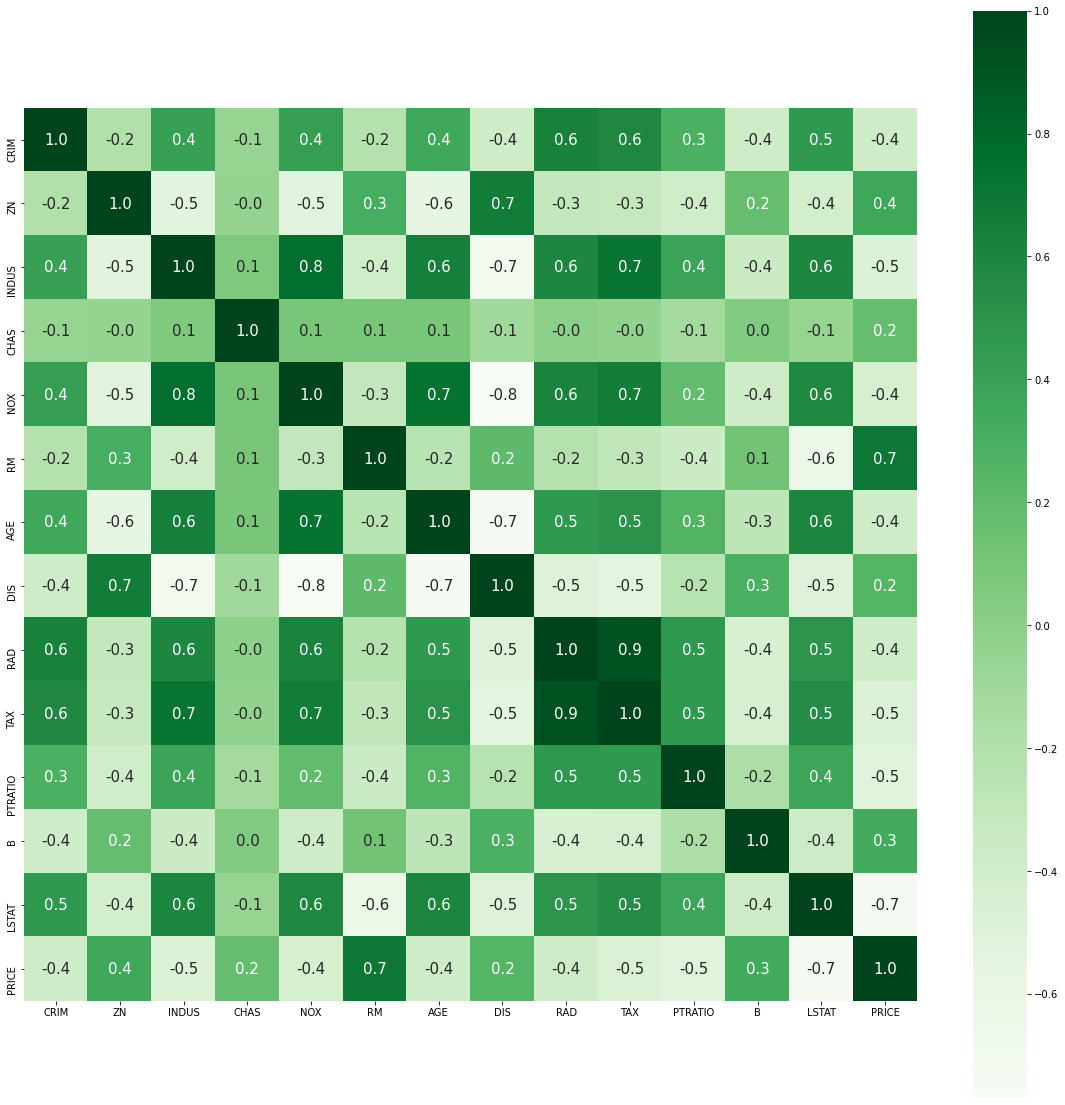

In [22]:
# Plotting the heatmap of correlation between features
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [23]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
m = ExtraTreesRegressor()
m.fit(features,prices)

ExtraTreesRegressor()

In [25]:
print(m.feature_importances_)

[0.02932694 0.00505348 0.03370739 0.01550822 0.04263984 0.32478206
 0.01947788 0.03264661 0.01497225 0.04908024 0.06464384 0.01759977
 0.3505615 ]


In [26]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [27]:
#Based on above value , we will train model on important feature to avoid curse of dimentionality.

features = features[['RM','PTRATIO','LSTAT']]

In [28]:
cols = list(features.columns)

for col in cols:
    # find minimum and maximum of that column
    minimum = min(features[col])
    maximum = max(features[col])
    features[col] = (features[col] - minimum) / (maximum - minimum)


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  
print(vif_data)

   feature       VIF
0       RM  4.395454
1  PTRATIO  7.766704
2    LSTAT  3.784779


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


From above we can see there's no collinearity among above features

### Building Model

In [30]:
!pip install lazypredict

In [31]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 3)
(102, 3)
(404,)
(102,)


In [34]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

print(models)

100%|██████████| 42/42 [00:03<00:00, 13.47it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
ExtraTreesRegressor                          0.84  ...        0.18
HistGradientBoostingRegressor                0.84  ...        0.19
LGBMRegressor                                0.84  ...        0.07
RandomForestRegressor                        0.84  ...        0.21
GradientBoostingRegressor                    0.83  ...        0.10
BaggingRegressor                             0.83  ...        0.04
KNeighborsRegressor                          0.82  ...        0.02
PoissonRegressor                             0.79  ...        0.02
XGBRegressor                                 0.79  ...        0.17
AdaBoostRegressor                            0.78  ...        0.06
SVR                                          0.77  ...        0.02
NuSVR                                        0.76  ...        0.05
RANSACRegressor                              0.76  ...        

In [35]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.84,0.85,3.47,0.18
HistGradientBoostingRegressor,0.84,0.84,3.50,0.19
LGBMRegressor,0.84,0.84,3.51,0.07
RandomForestRegressor,0.84,0.84,3.53,0.21
GradientBoostingRegressor,0.83,0.84,3.57,0.10
BaggingRegressor,0.83,0.84,3.58,0.04
KNeighborsRegressor,0.82,0.82,3.73,0.02
PoissonRegressor,0.79,0.80,3.99,0.02
XGBRegressor,0.79,0.79,4.02,0.17


From above table , we clearly see results of each algorithm performance on data hence decided to build model on Top 5 algorithm

In [36]:
##XGBoost Regressor
parameters = {
    'n_estimators':list(range(100,1001,100)),
    'learning_rate':[x/100 for x in range(5,100,10)],
                    'max_depth':list(range(6,90,10))
    }


parameters

{'learning_rate': [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95],
 'max_depth': [6, 16, 26, 36, 46, 56, 66, 76, 86],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
gsearch = GridSearchCV(XGBRegressor(random_state=1),
                       param_grid = parameters, 
                       scoring='neg_mean_absolute_error',
                       n_jobs=2,cv=5, verbose=1)

In [38]:
gsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   36.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 2178 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 3478 tasks      | elapsed:  4.8min
[Parallel(n_jobs=2)]: Done 4500 out of 4500 | elapsed:  5.7min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [39]:
best_n_estimators = gsearch.best_params_.get('n_estimators')
best_n_estimators

100

In [40]:
best_learning_rate = gsearch.best_params_.get('learning_rate')
best_learning_rate

0.05

In [41]:
best_max_depth = gsearch.best_params_.get('max_depth')
best_max_depth

6

In [42]:
final_model = XGBRegressor(n_estimators=best_n_estimators,random_state=1,learning_rate = best_learning_rate,max_depth=best_max_depth)
final_model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
Y_train_pred_XGB =final_model.predict(X_train) ##Predict train result
Y_test_pred_XGB =final_model.predict(X_test) ##Predict test result


In [45]:
# Model Evaluation on train
import sklearn.metrics as metrics
print('R^2:',metrics.r2_score(Y_train, Y_train_pred_XGB))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_train_pred_XGB))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_train_pred_XGB))
print('MSE:',metrics.mean_squared_error(Y_train, Y_train_pred_XGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_XGB)))

R^2: 0.9619857636477378
Adjusted R^2: 0.9617006568750959
MAE: 1.2983151317823052
MSE: 3.2654874343502454
RMSE: 1.8070659739893962


In [46]:
# Model Evaluation on test
print('R^2:',metrics.r2_score(Y_test, Y_test_pred_XGB))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test,Y_test_pred_XGB))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_test_pred_XGB))
print('MSE:',metrics.mean_squared_error(Y_test,Y_test_pred_XGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred_XGB)))

R^2: 0.814112616317162
Adjusted R^2: 0.8084221862044221
MAE: 2.7261659416497914
MSE: 14.553842411858225
RMSE: 3.814949857056869


In [47]:
### Random Forest

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.839284873415514

In [50]:
## Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
grid_param = {
    "n_estimators" : [90,100,115,130,150,200],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2','sqrt']
}
rf = RandomizedSearchCV(estimator = reg, param_distributions = grid_param, cv = 10, n_jobs=-1, verbose=3)
rf.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.1s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130, 150,
                                                         200]},
                   verbose=3)

In [51]:
Y_train_pred_RF = rf.predict(X_train) ##Predict train result
Y_test_pred_RF = rf.predict(X_test) ##Predict test result

In [52]:
# Model Evaluation on train
print('R^2:',metrics.r2_score(Y_train, Y_train_pred_XGB))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_train_pred_XGB))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_train_pred_XGB))
print('MSE:',metrics.mean_squared_error(Y_train, Y_train_pred_XGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_XGB)))

R^2: 0.9619857636477378
Adjusted R^2: 0.9617006568750959
MAE: 1.2983151317823052
MSE: 3.2654874343502454
RMSE: 1.8070659739893962


In [53]:
# Model Evaluation on test
print('R^2:',metrics.r2_score(Y_test, Y_test_pred_XGB))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test,Y_test_pred_XGB))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_test_pred_XGB))
print('MSE:',metrics.mean_squared_error(Y_test,Y_test_pred_XGB))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred_XGB)))

R^2: 0.814112616317162
Adjusted R^2: 0.8084221862044221
MAE: 2.7261659416497914
MSE: 14.553842411858225
RMSE: 3.814949857056869


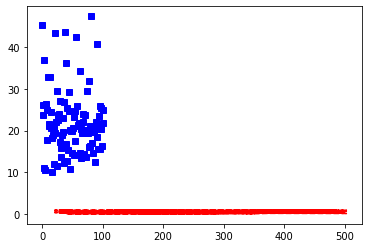

In [54]:
import numpy as np

# red dashes, blue squares and green triangles
plt.plot( X_test, 'r--', Y_test_pred_RF, 'bs')
plt.show()

In [55]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
SR = svm.SVR()

In [60]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SR, param_grid = parameters, 
                       scoring='neg_mean_absolute_error',
                       n_jobs=2,cv=5, verbose=1)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
Y_train_pred_SVR = grid.predict(X_train) ##Predict train result
Y_test_pred_SVR = grid.predict(X_test) ##Predict test result

In [62]:
print('R^2:',metrics.r2_score(Y_train, Y_train_pred_SVR))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_train_pred_SVR))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_train_pred_SVR))
print('MSE:',metrics.mean_squared_error(Y_train, Y_train_pred_SVR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_SVR)))


R^2: 0.7963214898268441
Adjusted R^2: 0.7947939010005455
MAE: 2.537363840880468
MSE: 17.49632978167243
RMSE: 4.182861434672732


In [63]:
### Model Evaluation on test
print('R^2:',metrics.r2_score(Y_test, Y_test_pred_SVR))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test,Y_test_pred_SVR))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_test_pred_SVR))
print('MSE:',metrics.mean_squared_error(Y_test,Y_test_pred_SVR))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred_SVR)))

R^2: 0.8465686036399884
Adjusted R^2: 0.8418717241595799
MAE: 2.550208106493008
MSE: 12.012737601734985
RMSE: 3.4659396419636312


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

knn = neighbors.KNeighborsRegressor()

model_knn = GridSearchCV(knn, params, cv=5)
model_knn.fit(X_train,Y_train)
model_knn.best_params_

{'n_neighbors': 9}

In [68]:
Y_train_pred_knn = model_knn.predict(X_train) ##Predict train result
Y_test_pred_knn = model_knn.predict(X_test) ##Predict test result

In [69]:
print('R^2:',metrics.r2_score(Y_train, Y_train_pred_knn))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_train_pred_knn))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_train_pred_knn))
print('MSE:',metrics.mean_squared_error(Y_train, Y_train_pred_knn))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred_knn)))


R^2: 0.8161811516444499
Adjusted R^2: 0.8148025102817833
MAE: 2.5211496149614963
MSE: 15.79035111844518
RMSE: 3.9737074777146315


In [70]:
### Model Evaluation on test
print('R^2:',metrics.r2_score(Y_test, Y_test_pred_knn))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test,Y_test_pred_knn))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_test_pred_knn))
print('MSE:',metrics.mean_squared_error(Y_test,Y_test_pred_knn))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred_knn)))

R^2: 0.8185005807978785
Adjusted R^2: 0.8129444761284257
MAE: 2.780065359477124
MSE: 14.210291696925683
RMSE: 3.7696540553379276


In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

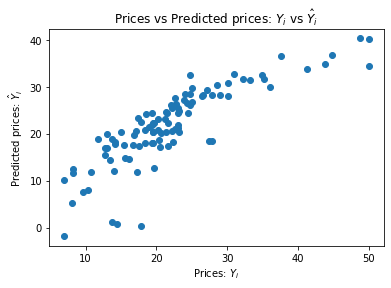

In [72]:
Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [73]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6915878280744175

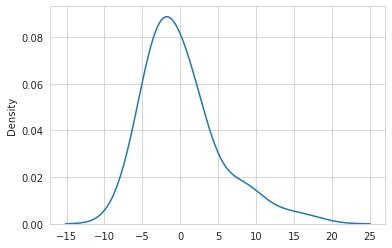

In [74]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

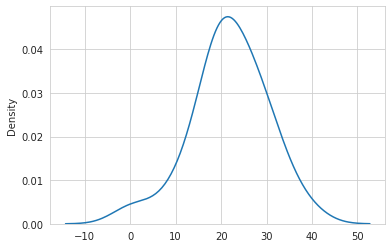

In [75]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

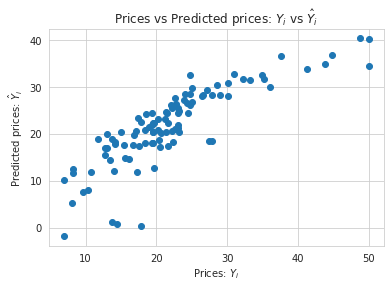

In [78]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

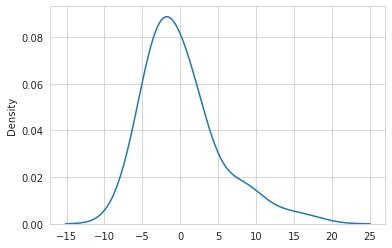

In [79]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


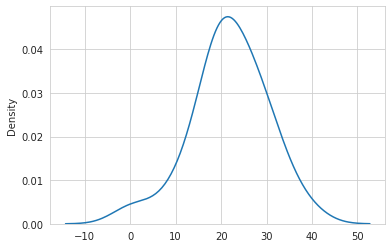

In [80]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

From Above we can see clearly XGBoost performance is way better than others